In [4]:
import numpy as np
import random

# Yang-Lee zeros of the 1D Ising model


# In the class we had:


\begin{equation*}
Z_{N} =\lambda _{+}^{N} +\lambda _{-}^{N} ,\quad \lambda _{\pm } =e^{\beta J}\cosh \beta B\pm \sqrt{e^{2\beta J}\cosh^{2} \beta B-2\sinh 2\beta J}
\end{equation*}


Introducing $\displaystyle \tau =e^{-2\beta J}$ and $\displaystyle \rho =e^{-2\beta B}$ we can write:


\begin{equation*}
\lambda _{\pm } =\dfrac{\rho +1}{2\sqrt{\rho \tau }} \pm \sqrt{\dfrac{( \rho +1)^{2}}{4\rho \tau } +\dfrac{\tau ^{2} -1}{\tau }} \Longrightarrow Z=\left[\dfrac{\rho +1}{2\sqrt{\rho \tau }} +\sqrt{\dfrac{( \rho +1)^{2}}{4\rho \tau } +\dfrac{\tau ^{2} -1}{\tau }}\right]^{N} +\left[\dfrac{\rho +1}{2\sqrt{\rho \tau }} -\sqrt{\dfrac{( \rho +1)^{2}}{4\rho \tau } +\dfrac{\tau ^{2} -1}{\tau }}\right]^{N}
\end{equation*}


It can be solved numerically, but I don't want to do it in Python, better Mathematica. Graphically nods for $N=10,\, 50,\, 500,\, 1000$ look like that:

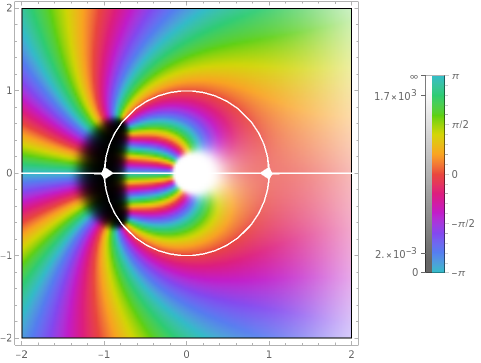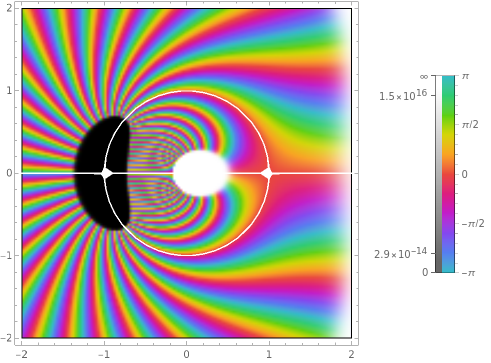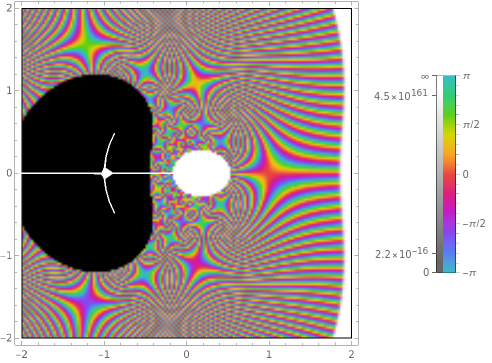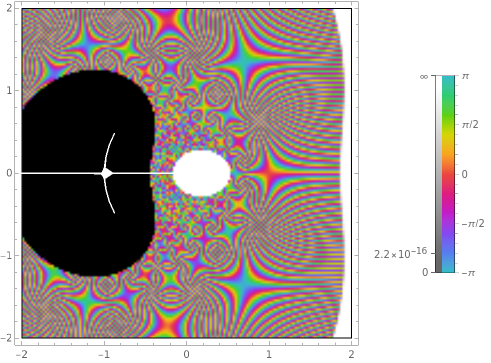

Here $\tau=0.95$. The dark regions are for small $|Z|$, the light regions are for high ones. The white circle has radius $r=1$. As we see, after $N=500$ the "nodal manifold" becomes stable, so we can put $N=500$ for further calcualtions.

Now let's look what happens if we increase $\beta$. In terms of our variables it means, that we will continiously decrease $\tau$ from $0.95$ to $0$. 

Choosing $N=500$ we get the following pictures for $\tau=0.8,\,0.5,\,0.1,\,10^{-5}$:

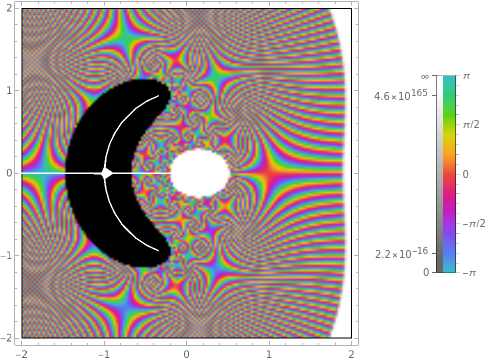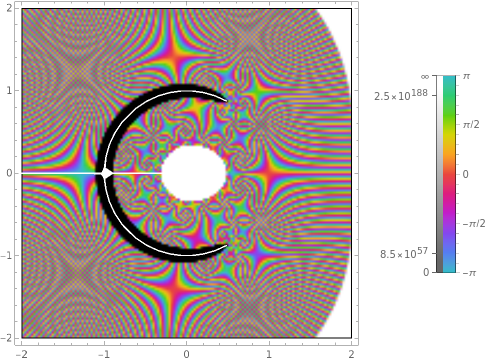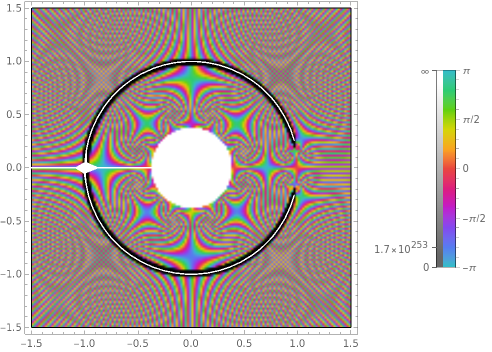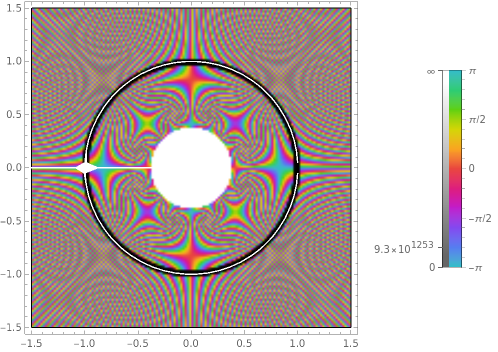

So, at the end we see, that what we have is "nodal circle". On the picture it is closed already at $\tau=10^{-5}$, but of course, we understand, that the real transition happens at $\tau=0$, the plotter just can't distinguish these two.

Note, that for the left part of the circle we have a white line on the real axis. This actually means, that we don't have nods on the left part of the real axis, and when the circle closes at $\beta\rightarrow\infty$ we get a real-valued solution for $Z(\rho)=0$, which is exactly the criteria for a phase transition (we have a real-valued system configuration, where the logarythm of the partition function diverges)

# Test your ‘random number generator’ !

Let us calculate some quantities for random variable $x$ such that $p(x)=\Theta(x)+\Theta(1-x)$, which is just uniform distribution on $[0,1]$.
$
\langle x\rangle =\int\limits _{0}^{1} d x x =\dfrac{1}{2} ,\quad \langle x^{2} \rangle -\langle x\rangle ^{2} =\int\limits _{0}^{1} d x x^{2} -\left(\int\limits _{0}^{1} d x x\right)^{2} =\dfrac{1}{12} ,\quad \langle x_{i} x_{i+k} \rangle =\int\limits _{0}^{1} d x_{i}\int\limits _{0}^{1} d x_{i+k} \, x_{i} x_{i+k} =\dfrac{1}{4}
$

In [187]:
def Test( SampleNumber ):

    M = np.random.rand( SampleNumber )

    Mean = sum(M) / SampleNumber

    Variance = sum(M**2) / SampleNumber - Mean**2

    k = 3
    s=0

    for i in range ( SampleNumber - k ):
    
        s += M[i] * M[i+k]
    
    Correlation = s / ( SampleNumber - k ) 

    return ( ( Mean - 1/2 ) , ( Variance - 1/12 ) , ( Correlation - 1/4 ) )

In [188]:
Test(10**6)

(0.00010630631651153966, -6.8060248695614445e-05, 4.2531308936166745e-05)

So, what we can see is that numerical result differs from analytical one only in 4th number after the comma, so the generator must be ok.

# 1D Ising – numerically

Now we are going to simulate 1D Ising model with periodic boundary and $J=B=\beta=1$.

In [555]:
N = 512 # the lattice size


def Initial (N): #sampling random <<initial>> state with spin values 1 and -1
    
    M = np.random.randint ( 2 , size = N )
    
    return 2*M-1 


def GibbsMetropolis (State, T, Steps): #Samples us Gibbs-distributed state with Metropolis dynamics
    
    for n in range (Steps):
    
        i = np.random.randint (N)

        dE =  2 * State[i] * ( State [(i+1)%N] + State [(i-1)%N] + 1 )
                
        p  = min( 1 , np.exp( -dE / T ) )
            
        if np.random.binomial( 1 , p ) == 1:
            
            State[i] = - State[i]
            
    return State 


def GibbsGlauber (State, T, Steps): #Samples us Gibbs-distributed state with Glauber dynamics
    
    for n in range (Steps):
    
        i = np.random.randint (N)
        
        dE =  2 * State[i] * ( State [(i+1)%N] + State [(i-1)%N] + 1 )
                
        p  = 1 / ( 1 + np.exp( dE / T ) )
            
        if np.random.binomial( 1 , p ) == 1:
            
            State[i] = - State[i]
            
    return State 

def Magnetization ( State ): #mean magnetization value
    
    m = sum ( State ) / len( State )
    
    return m

Now let us plot the depenpence of mean mahnetization on number of steps. We will do it for three types of initial condition: "all ups" (1) , "all down" (2) and random one (3): 

In [2]:
%matplotlib notebook

from matplotlib import pyplot as plt

In [90]:
Ss = np.arange ( 1, 8000, 20 )

Ms1 = list(Magnetization( GibbsMetropolis ( np.ones(N) , 1 , s) ) for s in Ss)

Ms2 = list(Magnetization( GibbsMetropolis ( -np.ones(N) , 1 , s) ) for s in Ss)

Ms3 = list(Magnetization( GibbsMetropolis ( Initial(N) , 1 , s) ) for s in Ss)

<IPython.core.display.Javascript object>


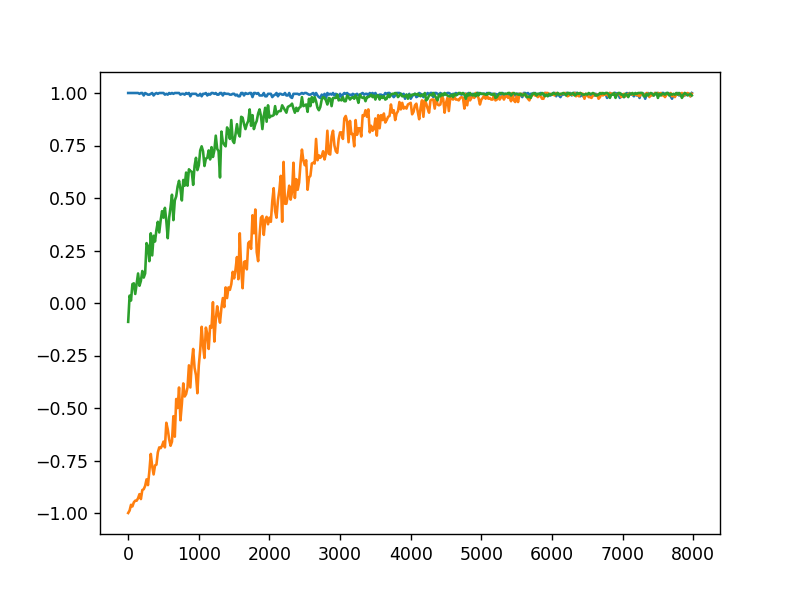

In [92]:
plt.plot( Ss , Ms1 )
plt.plot( Ss , Ms2 )
plt.plot( Ss , Ms3 )

So we see, that everything converges to $\langle m \rangle = 1$, and the closer we start, the faster we converge. For "all ones" initial state the convergence happens immediately. The convergence to $\langle m \rangle = 1$ is no wonder, because in the presense of the field $B=1$ the temperature $T=1$ is obviously enough for ordering. For $T=10$, for example, things change dramatically:

<IPython.core.display.Javascript object>


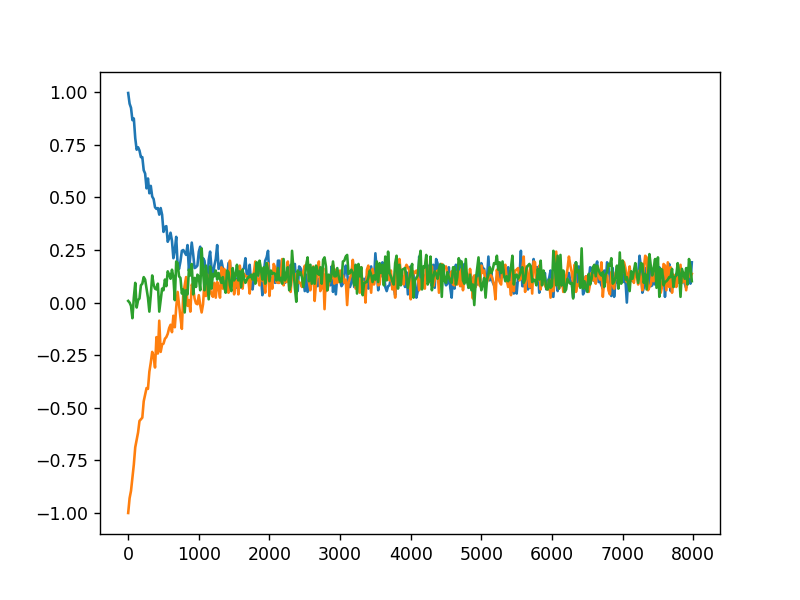

In [94]:
Ms1 = list(Magnetization( GibbsMetropolis ( np.ones(N) , 10 , s) ) for s in Ss)

Ms2 = list(Magnetization( GibbsMetropolis ( -np.ones(N) , 10 , s) ) for s in Ss)

Ms3 = list(Magnetization( GibbsMetropolis ( Initial(N) , 10 , s) ) for s in Ss)

plt.plot( Ss , Ms1 )
plt.plot( Ss , Ms2 )
plt.plot( Ss , Ms3 )

So we see that it takes more or less the same time for system to forget about any initial condition. After forgetting we see (second graph), that all the values fluctuate with the same variance around the same expectation value. We expect the variance to decrease with increasing number of steps, but already for $10^5$ steps it takes noticebaly much time to calculate all of that. That's why we don't plot this decreasing of variance. 

Let us now repeat the same for Glauber dynamics:

In [88]:
Ss = np.arange ( 1, 8000, 20 )

Ms1 = list(Magnetization( GibbsGlauber ( np.ones(N) , 1 , s) ) for s in Ss)

Ms2 = list(Magnetization( GibbsGlauber ( -np.ones(N) , 1 , s) ) for s in Ss)

Ms3 = list(Magnetization( GibbsGlauber ( Initial(N) , 1 , s) ) for s in Ss)

<IPython.core.display.Javascript object>


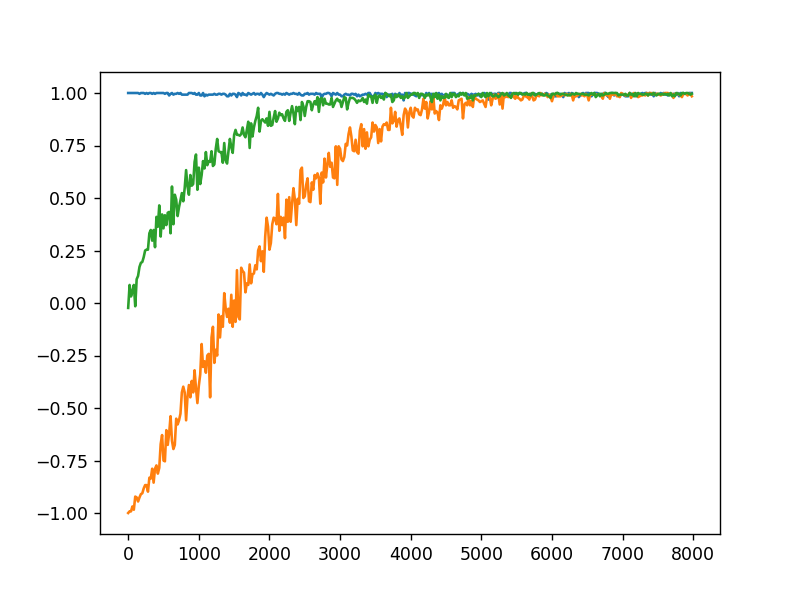

In [89]:
plt.plot( Ss , Ms1 )
plt.plot( Ss , Ms2 )
plt.plot( Ss , Ms3 )

What we see is that the picture really similar. However, for Glauber sampling it takes a little bit more steps to forget about initial state in compartion to Metropolis sampling. 

Let us now introduce both Metropolis and Glauber algorythms with completely random steps. They will obviously take more real time, just because we will have to calculate the energy explicitly. However, they may converge faster in steps, will see. 

In [182]:
def Energy (State, N):
    
    E = 0
    
    for i in range (N):
         
        E +=  -State[i] * State[(i+1)%N] - State[i]
            
    return E


def RandomGibbsMetropolis (State, T, Steps): 
    
    for n in range (Steps):
        
        TryState = Initial(N) # generating random state

        dE = Energy( TryState , N ) - Energy( State , N ) 
                
        p  = min( 1 , np.exp( -dE / T ) )
            
        if np.random.binomial( 1 , p ) == 1:
            
            State = TryState
            
    return State 


def RandomGibbsGlauber (State, T, Steps):
    
    for n in range (Steps):
    
        TryState = Initial(N)

        dE = Energy( TryState , N ) - Energy( State , N ) 
                
        p  = 1 / ( 1 + np.exp( dE / T ) )
            
        if np.random.binomial( 1 , p ) == 1:
            
            State = TryState
            
    return State 

Now we are going to draw the same graphs:

In [115]:
Ss1 = np.arange ( 1, 1000, 10 )

Ms1 = list(Magnetization( RandomGibbsMetropolis ( np.ones(N) , 1 , s) ) for s in Ss1)

Ms2 = list(Magnetization( RandomGibbsMetropolis ( -np.ones(N) , 1 , s) ) for s in Ss1)

Ms3 = list(Magnetization( RandomGibbsMetropolis ( Initial(N) , 1 , s) ) for s in Ss1)

<IPython.core.display.Javascript object>


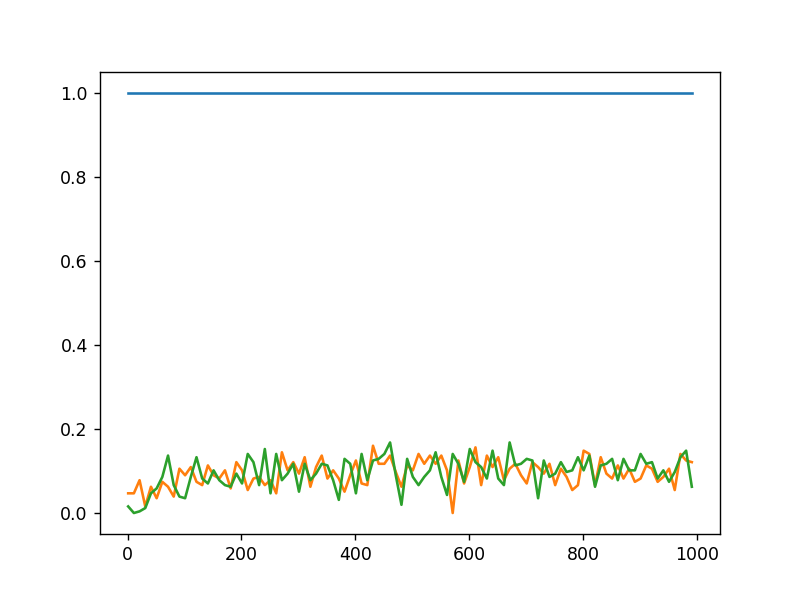

In [116]:
plt.plot( Ss1 , Ms1 )
plt.plot( Ss1 , Ms2 )
plt.plot( Ss1 , Ms3 )

What we see is that "all ones" initial condition coverges immediately as expected, and the other two don't converge at all. The reason for it is that "random state generator" which we use actually generates every spin as independent coin flip, and as the result we get states with $\langle m \rangle \sim 0$. To get better result it would be nice to get a generator of states uniformly distributed on the space of states. However, for this purpose we have to ask Python to deal with random variables which can possess $2^{512}$ values. Of course, Python won't work with such numbers. 

Just to be sure, let us try for Glauber:

In [117]:
Ms1 = list(Magnetization( RandomGibbsGlauber ( np.ones(N) , 1 , s) ) for s in Ss1)

Ms2 = list(Magnetization( RandomGibbsGlauber ( -np.ones(N) , 1 , s) ) for s in Ss1)

Ms3 = list(Magnetization( RandomGibbsGlauber ( Initial(N) , 1 , s) ) for s in Ss1)

C:\Users\besag\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


<IPython.core.display.Javascript object>


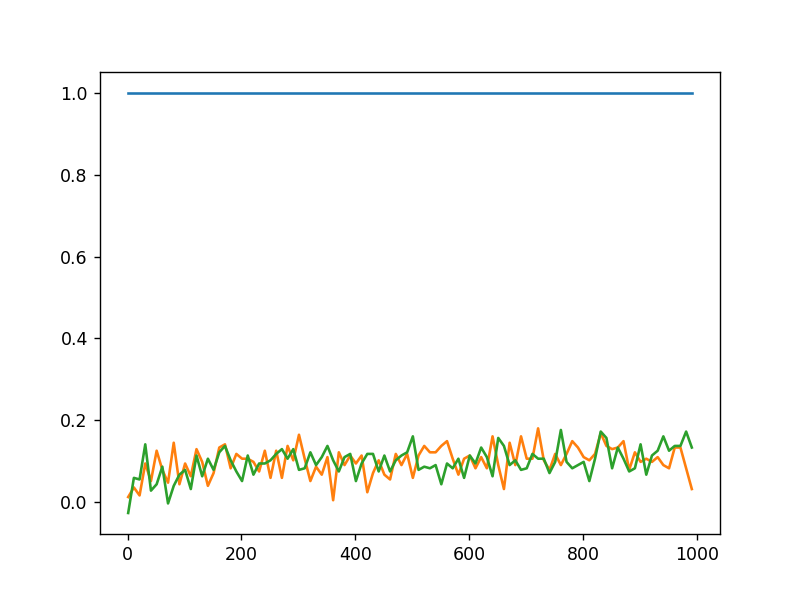

In [118]:
plt.plot( Ss1 , Ms1 )
plt.plot( Ss1 , Ms2 )
plt.plot( Ss1 , Ms3 )

The same. So, the method would work with $N\sim 10$, but since we have 512 elements we also have no hope. Let us try for $N=12$. For this purpose we should develop a generator:

In [180]:
def RandomState():
    
        i = np.random.randint(2**12)
        
        s = f'{i:012b}' #represents each state as binary number of fixed length 12

        State = list(2*int(d)-1 for d in s)
        
        return State
    
def RandomGibbsMetropolis12 (State, T, Steps): 
    
    for n in range (Steps):
        
        TryState = RandomState() # generating random state

        dE = Energy( TryState , 12 ) - Energy( State , 12 ) 
                
        p  = min( 1 , np.exp( -dE / T ) )
            
        if np.random.binomial( 1 , p ) == 1:
            
            State = TryState
            
    return State

In [185]:
Ss2 = np.arange ( 1, 3000, 20 )

Ms1 = list(Magnetization( RandomGibbsMetropolis12 ( np.ones(N) , 1 , s) ) for s in Ss2)

Ms2 = list(Magnetization( RandomGibbsMetropolis12 ( -np.ones(N) , 1 , s) ) for s in Ss2)

Ms3 = list(Magnetization( RandomGibbsMetropolis12 ( Initial(N) , 1 , s) ) for s in Ss2)

<IPython.core.display.Javascript object>


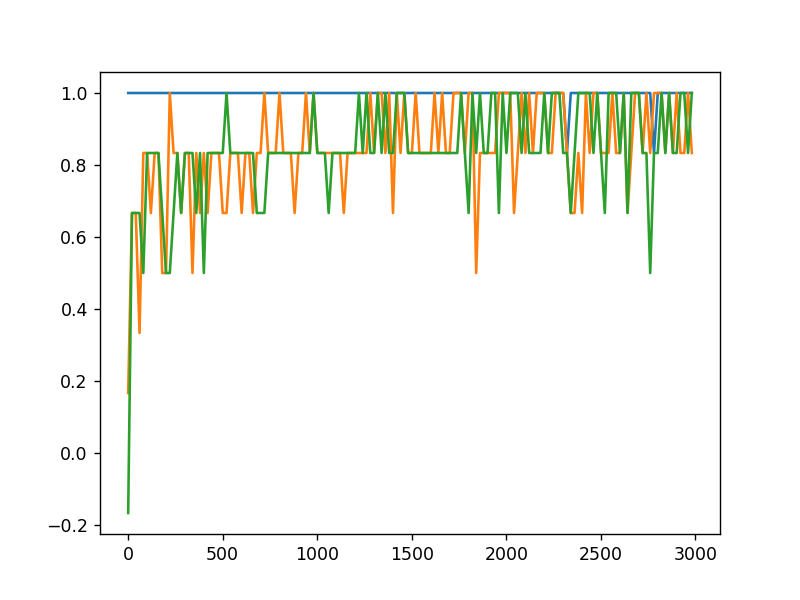

In [186]:
plt.plot( Ss2 , Ms1 )
plt.plot( Ss2 , Ms2 )
plt.plot( Ss2 , Ms3 )

So we see that yes, it works pretty good. Of course, fluctuations are coarse due to the number of spins, but anyway. Unfortunately, I don't not how to implement it in the case of 512 spins.

Now we are going to calculate some physical quantities as it is asked in the problem. We will use simple Metropolis sampling since it seems to be the fastest. First of all well-known analytical results:

$\langle E \rangle=-\partial_{\beta}\log Z=-N \partial_{\beta}\log\left(e^{\beta} \cosh \beta + \sqrt{e^{2 \beta} \cosh ^{2} \beta-2 \sinh 2 \beta }\right) \stackrel{\beta=1}{\approx} -N\cdot 1.98208 {\approx} -1014.82 $

$C_V =\beta^2 \langle E - \langle E \rangle \rangle ^2= \partial_T \langle E \rangle \stackrel{\beta=1}{\approx} N \cdot 0.114091 {\approx} 58.41$

$\langle \sigma_1 \sigma_R \rangle =\left\langle\sigma_{n} \sigma_{n+r}\right\rangle=\cos ^{2} \theta+\left(\frac{\lambda_{-}}{\lambda_{+}}\right)^{r} \sin ^{2} \theta,\quad \cos \theta=\frac{e^{\beta J} \sinh (\beta h)}{\sqrt{e^{-2 \beta J}+e^{2 \beta J} \sinh ^{2}(\beta h)}}$

In [556]:
def MeanE (T):
    
    E = 0

    for i in range (100) :
    
        E += Energy ( GibbsMetropolis ( np.ones(N) , T , 2000) , N ) #number of states is proper due to the graphs from p.1
    
    E = E / 100  
    
    return E

def Corr (T, r):
    
    c = 0
    
    for j in range (100):   
        
        cc = 0
            
        State = GibbsMetropolis ( np.ones(N) , T , 100)
    
        for i in range (N):
        
            cc += State[i]*State[(i+r)%N] / N
            
        c += cc  
        
    return c/100    

def AnalytE (B): #analytical energy  (-logZ derivative)
    
    Energ = -(N/2)*np.exp(-2*B)*(-2+np.exp(6*B)+np.exp(4*B)*(-1+2*np.sqrt(np.exp(-2*B)+np.exp(2*B)*(np.sinh(B))**2)))/(np.exp(B)*np.cosh(B)*(np.exp(B)*np.cosh(B)+np.sqrt(np.exp(2*B)*(np.cosh(B))**2-2*np.sinh(2*B)))-2*np.sinh(2*B))
                           
    return Energ
  

Let us now check the energy for different temperatures:

In [560]:
Tems = np.linspace ( 1, 50, 100 ) #Temperature scale
numEs = list(MeanE(t)/(-N) for t in Tems) 
analytEs = list(AnalytE(1/t)/(-N) for t in Tems)

<IPython.core.display.Javascript object>


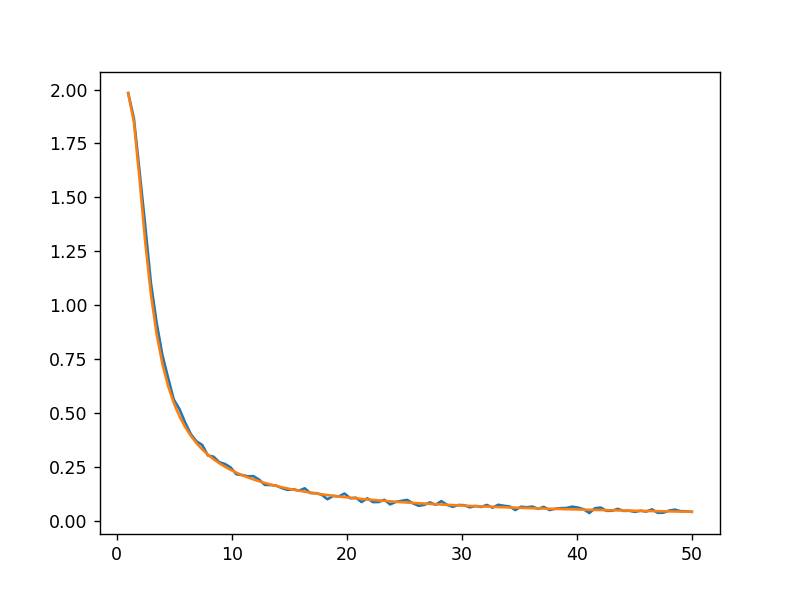

In [561]:
plt.plot( Tems , numEs )
plt.plot( Tems , analytEs )

So we can see, that the coincidence is perfect. Moreover, we also got a right result for specific heat capasity, since it is just a derivative $dE/dT$

For the correlation function we know, that for our parameters the $r$-dependence is almost invisible, and actually what we expect to see is $\langle \sigma_1 \sigma_R \rangle \approx\langle \sigma_1 \rangle \langle\sigma_R \rangle$

In [564]:
rs = np.arange ( 1, 90, 1 )
Corrs = list(Corr( 1 , r ) for r in rs)

<IPython.core.display.Javascript object>


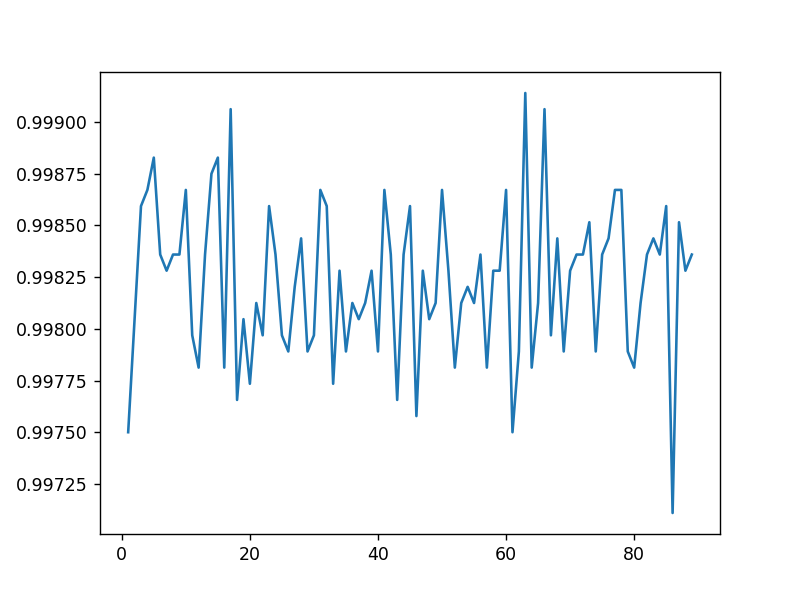

In [565]:
plt.plot( rs , Corrs )

Yes, that is the expected result: slight fluctuations around a value $\approx 1$